Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_data = pd.read_csv("C:/Users/Madhavi/Downloads/Mall_Customers.csv")

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
customer_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customer_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
customer_data.isnull().sum() 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
print("\nStatistical Summary:")
print(customer_data.describe())


Statistical Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [11]:
print("\n--- 2. Exploratory Data Analysis (EDA) ---")


--- 2. Exploratory Data Analysis (EDA) ---


In [12]:
sns.set_style("whitegrid")

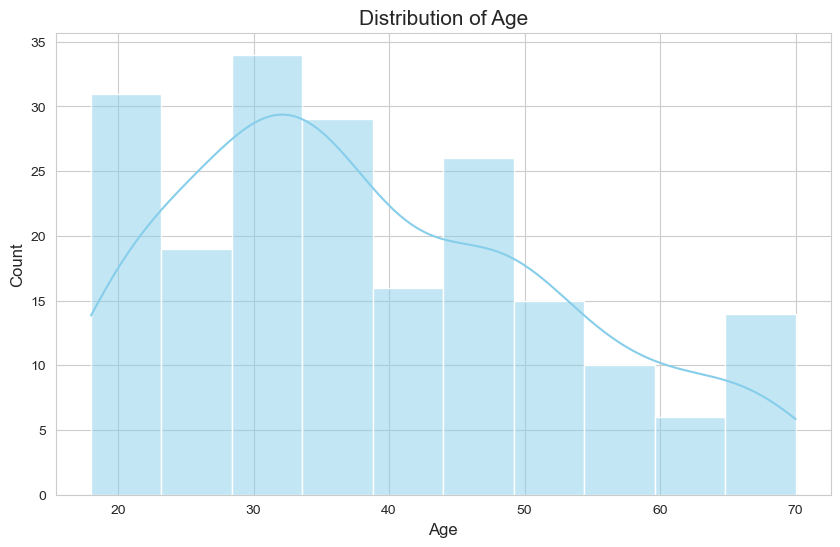

In [14]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [15]:
print("Interpretation: The age distribution shows a good spread, with peaks around early 20s, late 30s, and late 40s/early 50s.")

Interpretation: The age distribution shows a good spread, with peaks around early 20s, late 30s, and late 40s/early 50s.


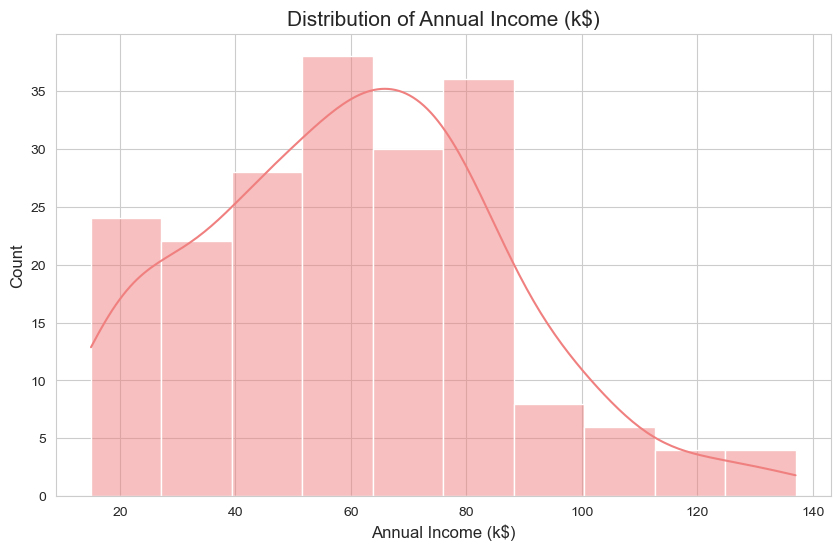

In [16]:
# Distribution of Annual Income (k$)
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Annual Income (k$)'], bins=10, kde=True, color='lightcoral')
plt.title('Distribution of Annual Income (k$)', fontsize=15)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [17]:
print("Interpretation: Annual income is somewhat normally distributed, with most customers earning between $50k and $80k.")

Interpretation: Annual income is somewhat normally distributed, with most customers earning between $50k and $80k.


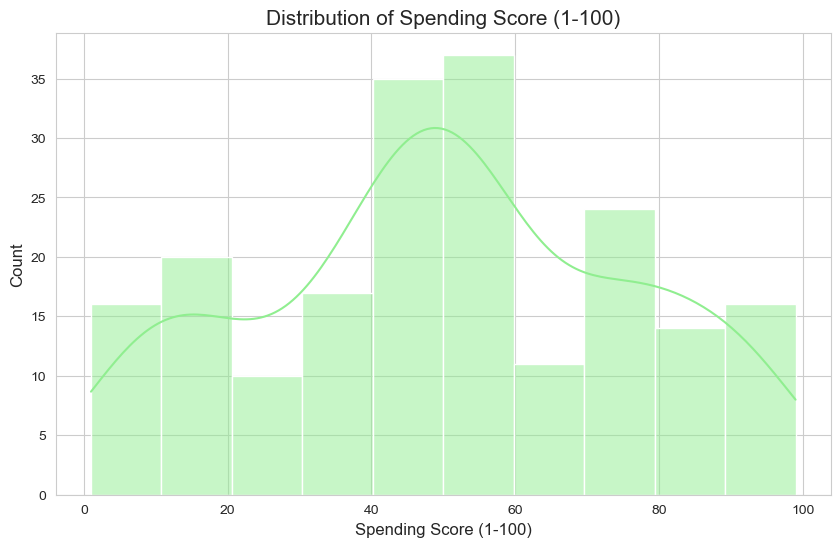

In [18]:
# Distribution of Spending Score (1-100)
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Spending Score (1-100)'], bins=10, kde=True, color='lightgreen')
plt.title('Distribution of Spending Score (1-100)', fontsize=15)
plt.xlabel('Spending Score (1-100)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [19]:
print("Interpretation: Spending scores are relatively evenly distributed, with slight peaks around 40-60.")

Interpretation: Spending scores are relatively evenly distributed, with slight peaks around 40-60.


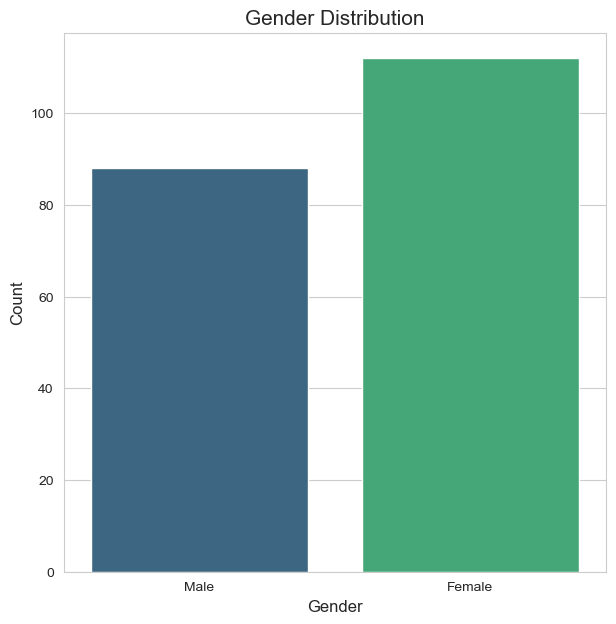

In [20]:
# Gender Distribution
plt.figure(figsize=(7, 7))
sns.countplot(x='Gender', data=customer_data, palette='viridis')
plt.title('Gender Distribution', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [21]:
print("Interpretation: There are more female customers than male customers in the dataset.")

Interpretation: There are more female customers than male customers in the dataset.



Pair Plot of Numerical Features:


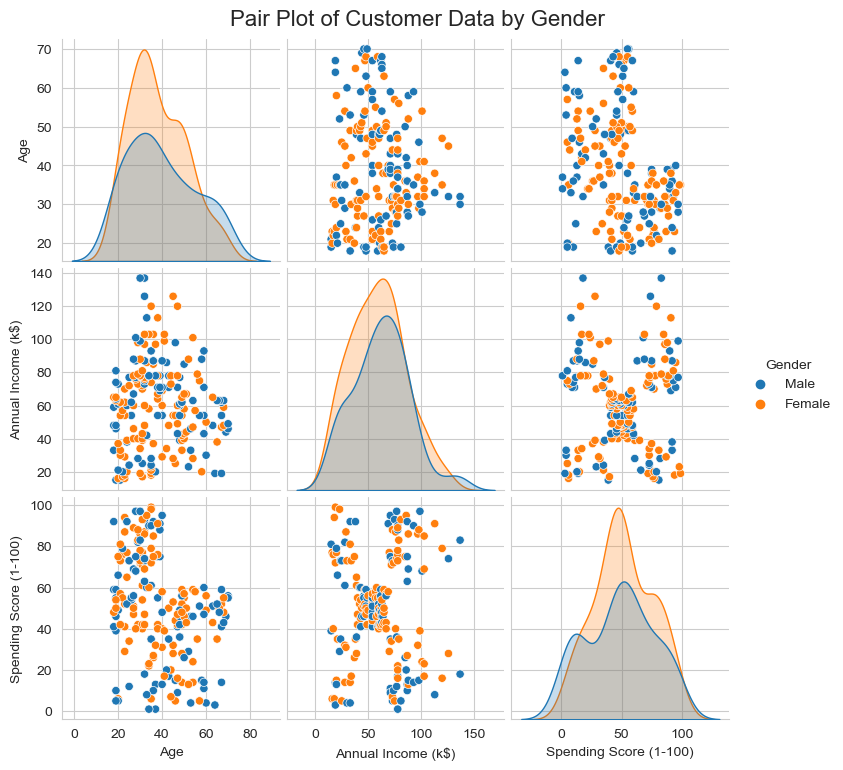

In [22]:
# Pair Plot to visualize relationships between numerical features
# This helps to see initial clusters or correlations
print("\nPair Plot of Numerical Features:")
sns.pairplot(customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender', diag_kind='kde')
plt.suptitle('Pair Plot of Customer Data by Gender', y=1.02, fontsize=16)
plt.show()

In [23]:
print("Interpretation: The pair plot gives a high-level view of relationships. We can observe some potential groupings, especially between Annual Income and Spending Score, which will be the focus of K-Means.")

Interpretation: The pair plot gives a high-level view of relationships. We can observe some potential groupings, especially between Annual Income and Spending Score, which will be the focus of K-Means.


In [24]:
# --- 3. Determining Optimal Number of Clusters (Elbow Method) ---
print("\n--- 3. Determining Optimal Number of Clusters (Elbow Method) ---")

# Choosing the 'Annual Income (k$)' and 'Spending Score (1-100)' columns for clustering
# These two features are often used for customer segmentation in retail contexts
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]


--- 3. Determining Optimal Number of Clusters (Elbow Method) ---


In [25]:
# List to store the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters
wcss = []

In [26]:

# Try different numbers of clusters from 1 to 10
for i in range(1, 11):
    # Initialize KMeans with 'i' clusters and 'k-means++' for smart initialization
    # random_state for reproducibility
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    # Fit the model to the data
    kmeans.fit(X)
    # Append the WCSS (inertia) to the list
    wcss.append(kmeans.inertia_)

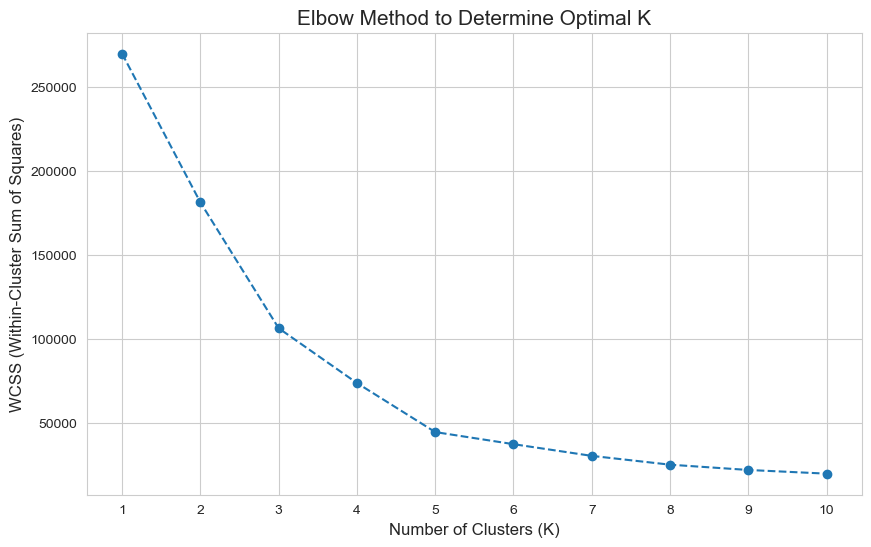

In [27]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal K', fontsize=15)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [28]:
print("Interpretation: The elbow method plot helps us find the optimal number of clusters. The 'elbow' point, where the rate of decrease in WCSS significantly slows down, indicates the optimal K. In this graph, the elbow appears to be at K=5.")

Interpretation: The elbow method plot helps us find the optimal number of clusters. The 'elbow' point, where the rate of decrease in WCSS significantly slows down, indicates the optimal K. In this graph, the elbow appears to be at K=5.


In [29]:
# Based on the elbow method, we choose 5 as the optimal number of clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

# Predict the clusters for each customer
# The fit_predict method performs both fitting and prediction
y_kmeans = kmeans.fit_predict(X)

In [30]:
# Add the cluster labels to our original DataFrame
customer_data['Cluster'] = y_kmeans
print(f"K-Means clustering performed with {optimal_k} clusters.")
print("\nFirst 5 rows with new 'Cluster' column:")
print(customer_data.head())

K-Means clustering performed with 5 clusters.

First 5 rows with new 'Cluster' column:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        3  
2        2  
3        3  
4        2  


In [31]:
# Get the cluster centroids
centroids = kmeans.cluster_centers_
print("\nCluster Centroids (Annual Income, Spending Score):")
print(centroids)


Cluster Centroids (Annual Income, Spending Score):
[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

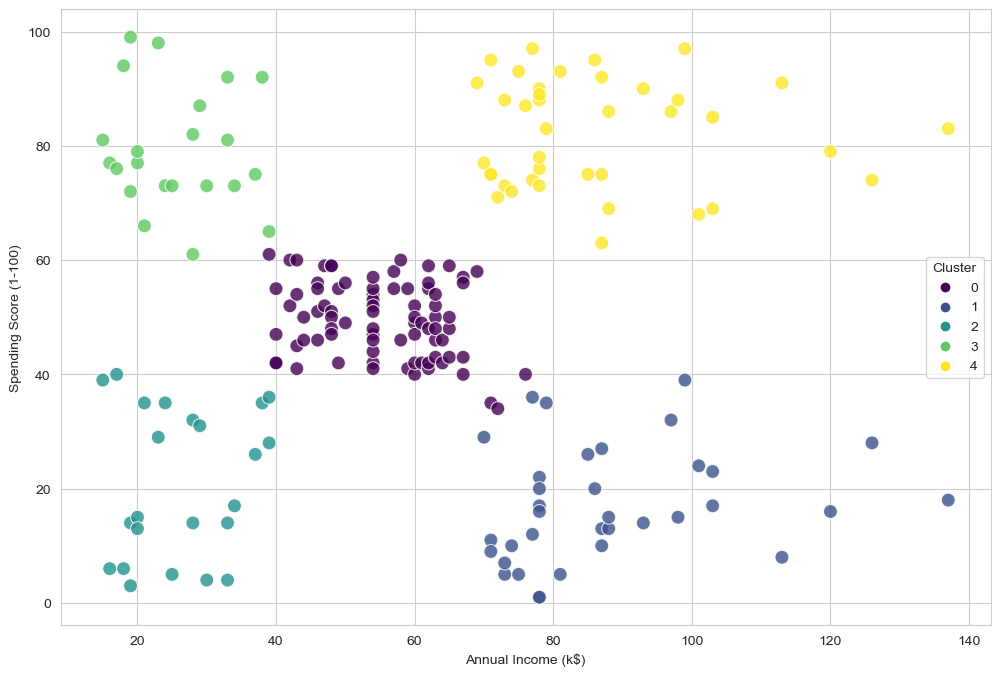

In [32]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=customer_data,
                palette='viridis', s=100, alpha=0.8, edgecolor='w')

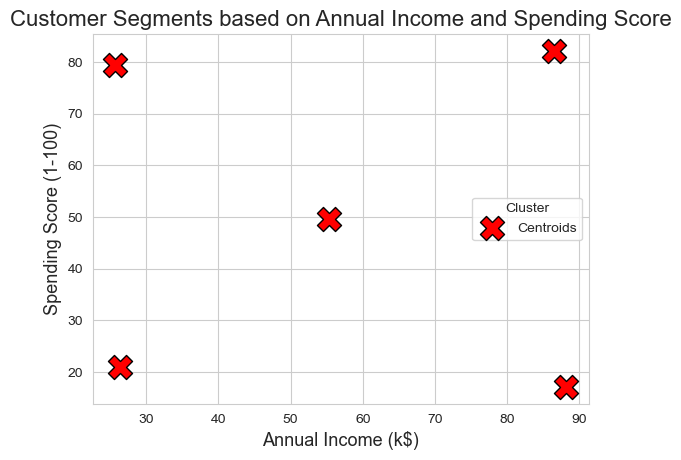

In [33]:
# Plot the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids', edgecolor='black')

plt.title('Customer Segments based on Annual Income and Spending Score', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=13)
plt.ylabel('Spending Score (1-100)', fontsize=13)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [34]:
# Analyze the characteristics of each cluster
cluster_summary = customer_data.groupby('Cluster').agg(
    Avg_Age=('Age', 'mean'),
    Avg_Annual_Income=('Annual Income (k$)', 'mean'),
    Avg_Spending_Score=('Spending Score (1-100)', 'mean'),
    Gender_Distribution=('Gender', lambda x: x.value_counts().to_dict()) # Get counts of Male/Female
).round(2)

In [35]:
print("\nSummary of Each Cluster:")
print(cluster_summary)

print("\nDetailed Interpretation of Customer Segments and Marketing Strategies:")


Summary of Each Cluster:
         Avg_Age  Avg_Annual_Income  Avg_Spending_Score  \
Cluster                                                   
0          42.72              55.30               49.52   
1          41.11              88.20               17.11   
2          45.22              26.30               20.91   
3          25.27              25.73               79.36   
4          32.69              86.54               82.13   

                Gender_Distribution  
Cluster                              
0        {'Female': 48, 'Male': 33}  
1        {'Male': 19, 'Female': 16}  
2         {'Female': 14, 'Male': 9}  
3         {'Female': 13, 'Male': 9}  
4        {'Female': 21, 'Male': 18}  

Detailed Interpretation of Customer Segments and Marketing Strategies:


In [38]:
# Iterate through each cluster to provide detailed insights
for i in range(optimal_k):
    print(f"\n--- Cluster {i} ---")
    # Corrected variable name from customer_summary to cluster_summary
    cluster_data = cluster_summary.loc[i]
    print(f"  Average Age: {cluster_data['Avg_Age']:.2f}")
    print(f"  Average Annual Income: ${cluster_data['Avg_Annual_Income']:.2f}k")
    print(f"  Average Spending Score: {cluster_data['Avg_Spending_Score']:.2f}")
    print(f"  Gender Distribution: {cluster_data['Gender_Distribution']}")

    if i == 0:
        print("  Description: Low Income, Low Spending. These customers have low annual income and low spending scores.")
        print("  Marketing Strategy: Focus on basic necessities, budget-friendly deals, and loyalty programs that offer small, consistent discounts. Avoid high-end promotions.")
    elif i == 1:
        print("  Description: High Income, High Spending (Target Customers). These are the most valuable customers with high income and high spending scores.")
        print("  Marketing Strategy: Offer premium products, exclusive services, personalized recommendations, and VIP events. Focus on retaining them and encouraging continued high spending.")
    elif i == 2:
        print("  Description: Low Income, High Spending. These customers have low income but high spending scores, likely impulsive buyers or those seeking value.")
        print("  Marketing Strategy: Offer attractive discounts, flash sales, and affordable luxury items. Encourage impulse purchases and highlight value for money. Consider flexible payment options.")
    elif i == 3:
        print("  Description: High Income, Low Spending. These customers have high income but low spending scores, possibly due to lack of appealing offers or specific needs.")
        print("  Marketing Strategy: Understand their preferences through surveys or personalized outreach. Offer high-value, niche products, and emphasize quality over quantity. Target them with exclusive, curated collections.")
    elif i == 4:
        print("  Description: Mid Income, Mid Spending. These are average customers with moderate income and spending habits.")
        print("  Marketing Strategy: Broad marketing campaigns, standard promotions, and a mix of product offerings. Aim to gradually upsell and cross-sell by understanding their evolving needs.")
    else:
        print("  Description: (Further analysis needed for additional clusters if K > 5)")


--- Cluster 0 ---
  Average Age: 42.72
  Average Annual Income: $55.30k
  Average Spending Score: 49.52
  Gender Distribution: {'Female': 48, 'Male': 33}
  Description: Low Income, Low Spending. These customers have low annual income and low spending scores.
  Marketing Strategy: Focus on basic necessities, budget-friendly deals, and loyalty programs that offer small, consistent discounts. Avoid high-end promotions.

--- Cluster 1 ---
  Average Age: 41.11
  Average Annual Income: $88.20k
  Average Spending Score: 17.11
  Gender Distribution: {'Male': 19, 'Female': 16}
  Description: High Income, High Spending (Target Customers). These are the most valuable customers with high income and high spending scores.
  Marketing Strategy: Offer premium products, exclusive services, personalized recommendations, and VIP events. Focus on retaining them and encouraging continued high spending.

--- Cluster 2 ---
  Average Age: 45.22
  Average Annual Income: $26.30k
  Average Spending Score: 20.91

In [39]:
print("\n--- Project Conclusion ---")
print("By segmenting customers based on their annual income and spending score, the mall can develop highly targeted marketing strategies, optimize resource allocation, and ultimately improve customer satisfaction and profitability.")


--- Project Conclusion ---
By segmenting customers based on their annual income and spending score, the mall can develop highly targeted marketing strategies, optimize resource allocation, and ultimately improve customer satisfaction and profitability.
